
# Streamlit Example Overview

This section explains **how Streamlit is used** in the standalone app **`Streamlit.example.py`** to build an interactive, real‑time Bitcoin monitoring dashboard.

---

## Why Streamlit?

* **Zero‑boilerplate web apps** – write pure Python, no HTML/CSS/JS.
* **Reactive UI** – every widget triggers an automatic rerun, keeping visualisations in sync with data.
* **Caching primitives** – `@st.cache_data` lets us memoise expensive API calls yet keep them fresh (`ttl`).
* **Tight plotting integration** – just pass a Plotly / Matplotlib figure to `st.plotly_chart` or `st.pyplot`.

---

## Architecture at a Glance

| Layer | Purpose | Key Streamlit APIs |
|-------|---------|--------------------|
| **Page Setup** | Global page title / layout | `st.set_page_config` |
| **Sidebar Controls** | User inputs (coin, date range, MA window, forecasting horizon, anomaly threshold) | `st.sidebar.selectbox`, `st.sidebar.slider`, `st.number_input` |
| **Data Layer** | Fetch & cache data from CoinGecko | `@st.cache_data`, `requests.get` |
| **Processing Layer** | TA indicators, anomaly detection, Prophet forecast | pure Pandas / `ta`, `prophet` |
| **Visual Layer** | Dynamic charts & KPIs | `st.metric`, `st.plotly_chart`, `st.expander` |
| **Portfolio Manager** | Simple holdings tracker stored in `st.session_state` | `st.expander`, `st.number_input`, `st.metric` |
| **News Feed** | Latest headlines via CryptoPanic | `st.expander`, Markdown |

---

## Walk‑through of `Streamlit.example.py`

```python
st.set_page_config(page_title="Crypto Dashboard Pro", layout="wide")
```
Sets a wide, responsive layout—ideal for multi‑column charts.

### 1. Sidebar

```python
selected_coin = st.selectbox("Select Cryptocurrency", list(CRYPTO_LIST.keys()))
days          = st.slider("Historical Days", 7, 365, 30)
ma_window     = st.selectbox("Moving Average Window", [7, 14, 30])
```
Every selection triggers a rerun, refreshing downstream data.

### 2. Fetch & Cache

```python
@st.cache_data(ttl=300)
def get_current_price(coin="bitcoin"):
    ...
```
1. Fetches JSON from `/simple/price` endpoint.  
2. Caches result for **5 minutes**, reducing API calls while keeping data fresh.

### 3. KPI & Portfolio

`st.metric` shows the live USD price;  
`portfolio_manager()` uses `st.session_state` so holdings persist across reruns.

### 4. Charts

* **Price & Moving Average** – `plotly.express.line`
* **Technical Indicators** – custom `go.Figure` with Bollinger Bands, RSI, MACD.
* **Anomalies** – red markers plotted where Z‑score > threshold.

### 5. Forecasting

Button triggers training of a Prophet model; forecast + components plotted with Plotly and Matplotlib.

### 6. News

Fetches top five headlines and displays them in collapsible `st.expander` blocks.

---

## Running the App Locally

```bash
pip install -r requirements.txt
streamlit run Streamlit.example.py
```

Streamlit opens a local browser tab (`localhost:8501`) where the dashboard updates automatically.

---

## Integration with the Jupyter Notebook

Although Streamlit apps run outside Jupyter, this notebook:

1. **Documents** the Streamlit architecture.
2. **Shows** the same data‑processing pipeline in notebook form.
3. **Provides** ready‑to‑copy code snippets for each Streamlit section.

This dual approach satisfies both reproducible research (notebook) and live deployment (Streamlit).




End-to-end demonstration of cryptocurrency analytics dashboard.

## Setup and Imports

### 1. Importing Dependencies
We begin by importing necessary packages including the utility functions defined in `XYZ_utils`.

In [14]:
# Import required libraries and functions from the utility module.
import pandas as pd
from Streamlit_utils import get_historical_data, calculate_moving_average, calculate_technical_indicators, detect_anomalies
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

## Fetch Historical Data

### 2. Fetching Data
Retrieve 180 days of historical Bitcoin price data.

In [2]:
# Fetch historical Bitcoin data for the last 180 days.
historical_data = get_historical_data('bitcoin', days=180)
historical_data.head()

,date,price
0,2024-11-14,90488.100075
1,2024-11-15,87407.512737
2,2024-11-16,90947.975094
3,2024-11-17,90606.454894
4,2024-11-18,89841.471941


## Data Processing and Analysis

### 3. Analyzing Data
Apply moving average and technical analysis functions to the historical dataset.

In [3]:
# Compute moving average and technical indicators.
historical_data_ma = calculate_moving_average(historical_data)
historical_data_ta = calculate_technical_indicators(historical_data_ma)
historical_data_ta.head()

,date,price,moving_average,RSI,MACD,MACD_signal,BB_upper,BB_lower
0,2024-11-14,90488.100075,90488.100075,NaN,NaN,NaN,NaN,NaN
1,2024-11-15,87407.512737,88947.806406,NaN,NaN,NaN,NaN,NaN
2,2024-11-16,90947.975094,89614.529302,NaN,NaN,NaN,NaN,NaN
3,2024-11-17,90606.454894,89862.510700,NaN,NaN,NaN,NaN,NaN
4,2024-11-18,89841.471941,89858.302948,NaN,NaN,NaN,NaN,NaN


## Anomaly Detection

### 4. Detecting Anomalies
Use statistical techniques to flag anomalies in market behavior.

In [4]:
# Detect anomalies in the processed data using statistical logic.
anomaly_data = detect_anomalies(historical_data_ta)
anomaly_data[anomaly_data['anomaly']].head()

,date,price,moving_average,RSI,MACD,MACD_signal,BB_upper,BB_lower,price_diff,z_score,anomaly
109,2025-03-03,94261.532865,87638.640905,51.173080,-2832.057058,-2385.634221,103244.723924,83760.686902,8256.276569,3.400338,True
110,2025-03-04,86124.714187,86885.490522,39.286105,-2983.950977,-2505.297572,103213.520422,82830.364086,-8136.818678,-3.410675,True


## Forecasting with Prophet

### 5. Forecasting Future Prices
Use Facebook Prophet to make short-term forecasts of Bitcoin prices.

11:13:29 - cmdstanpy - INFO - Chain [1] start processing
11:13:29 - cmdstanpy - INFO - Chain [1] done processing


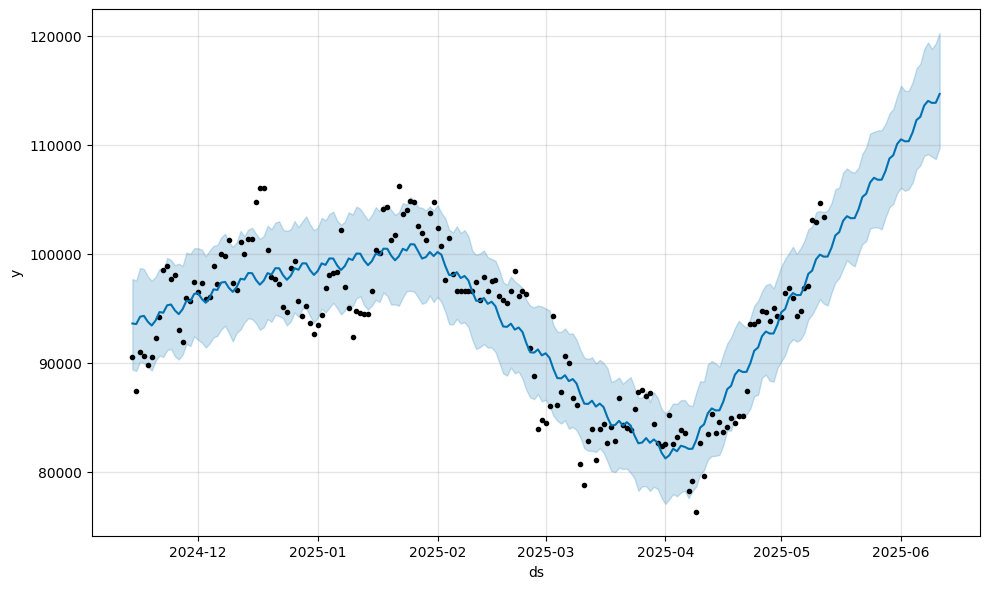

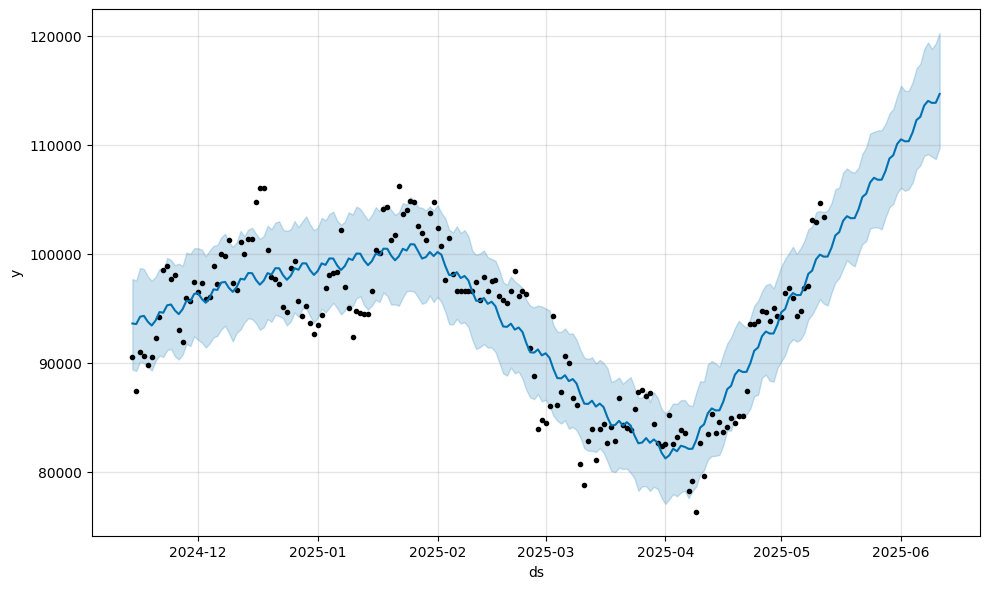

In [5]:
# Prepare data and apply Facebook Prophet for time series forecasting.
forecast_df = historical_data[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})
model = Prophet()
model.fit(forecast_df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)

## Visualization of Technical Indicators

### 6. Visualizing Technical Indicators
Generate interactive charts to visualize price trends, RSI, MACD, Bollinger Bands, etc.

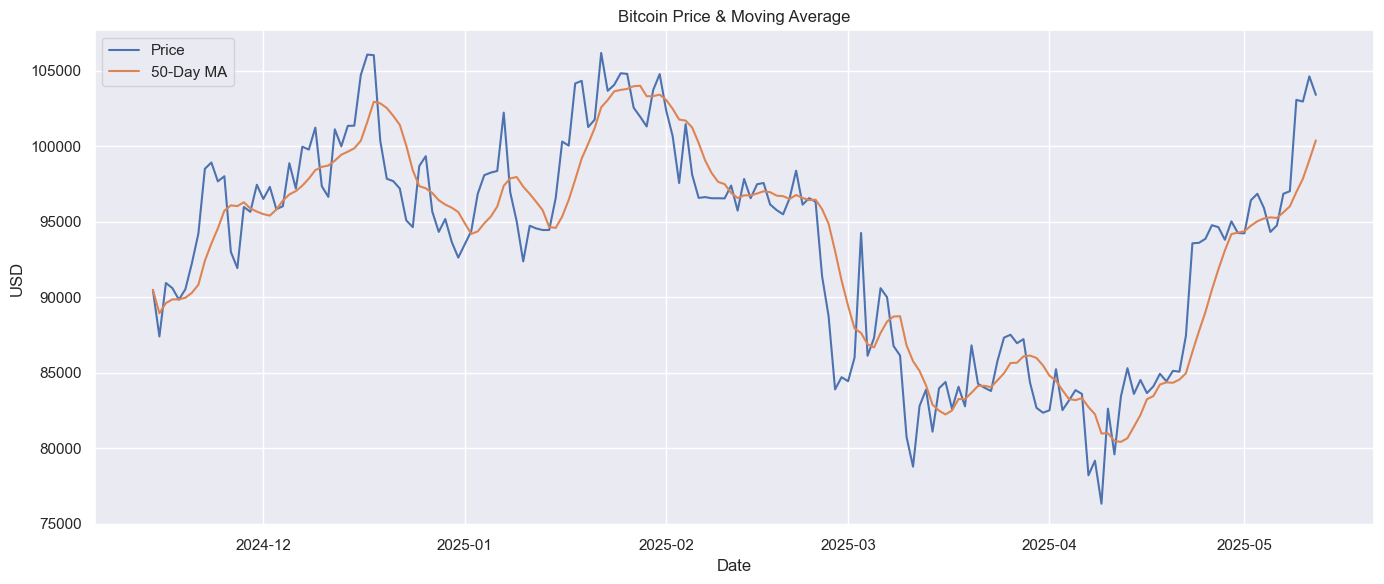

In [6]:
df = anomaly_data

# Set Seaborn style
sns.set(style="darkgrid")

# 1. Price vs. Moving Average
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='price', data=df, label='Price')
sns.lineplot(x='date', y='moving_average', data=df, label='50-Day MA')
plt.title('Bitcoin Price & Moving Average')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.tight_layout()
plt.show()

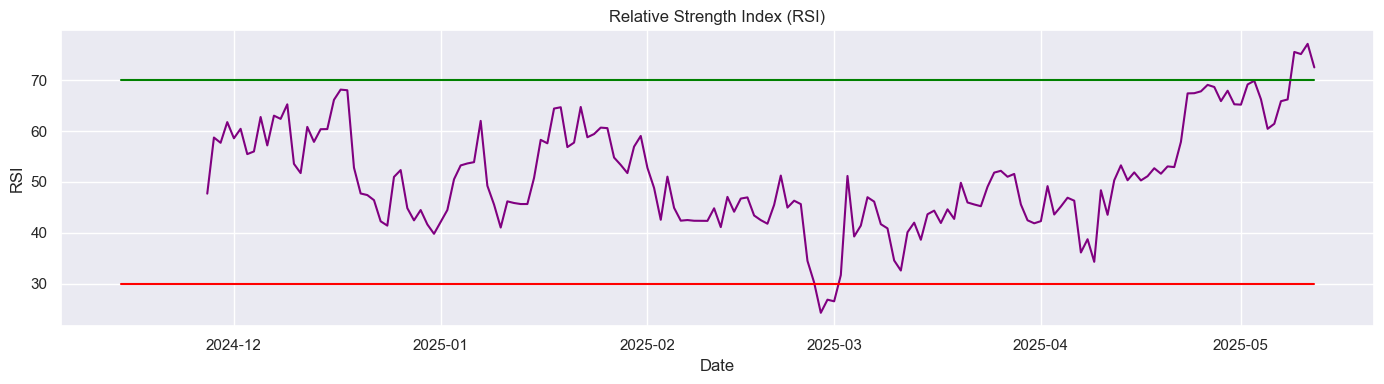

In [7]:
# 2. RSI Over Time
plt.figure(figsize=(14, 4))
sns.lineplot(x='date', y='RSI', data=df, color='purple')
sns.lineplot(data = df, x = "date", y = [30]*180, color = "red")
sns.lineplot(data = df, x = "date", y = [70]*180, color = "green")
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.tight_layout()
plt.show()

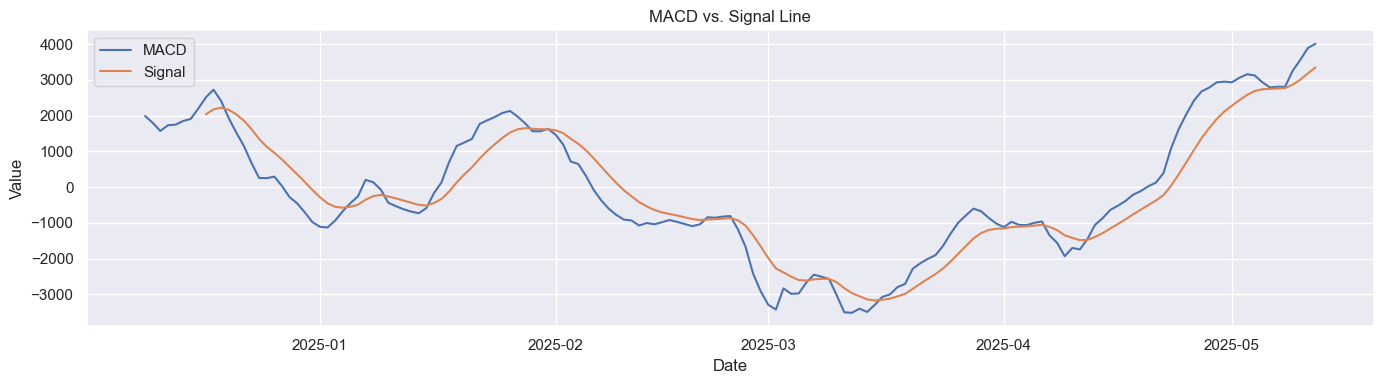

In [8]:
# 3. MACD & Signal Line
plt.figure(figsize=(14, 4))
sns.lineplot(x='date', y='MACD', data=df, label='MACD')
sns.lineplot(x='date', y='MACD_signal', data=df, label='Signal')
plt.title('MACD vs. Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

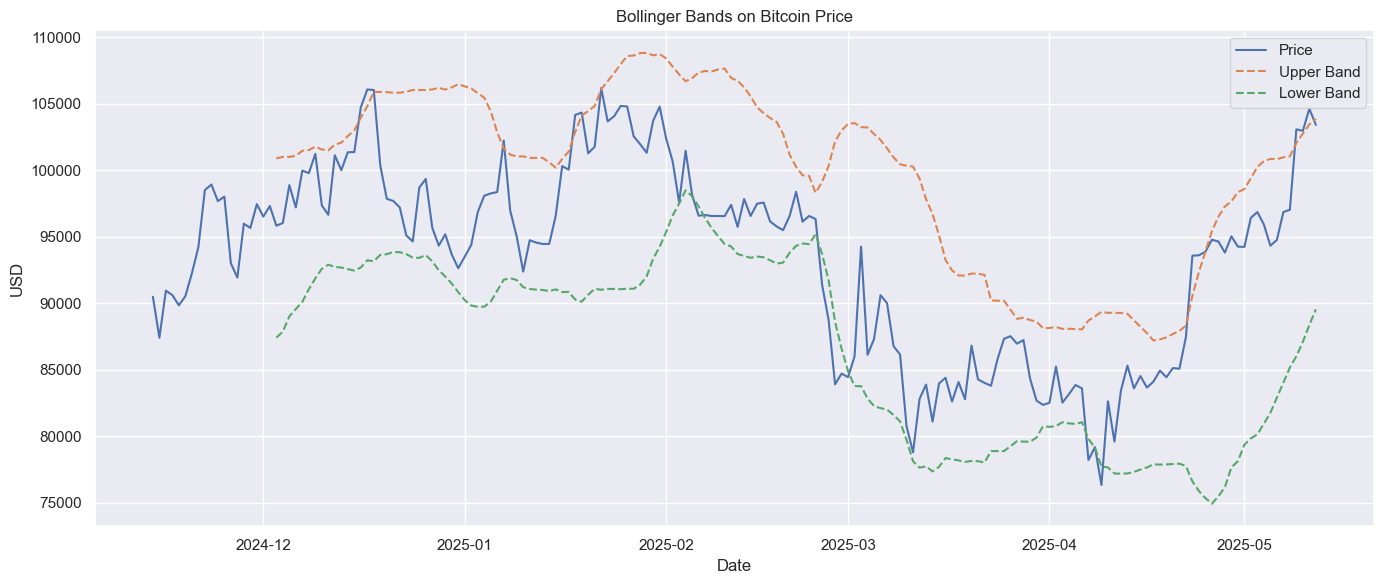

In [9]:
# 4. Bollinger Bands
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='price', data=df, label='Price')
sns.lineplot(x='date', y='BB_upper', data=df, linestyle='--', label='Upper Band')
sns.lineplot(x='date', y='BB_lower', data=df, linestyle='--', label='Lower Band')
plt.title('Bollinger Bands on Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.tight_layout()
plt.show()

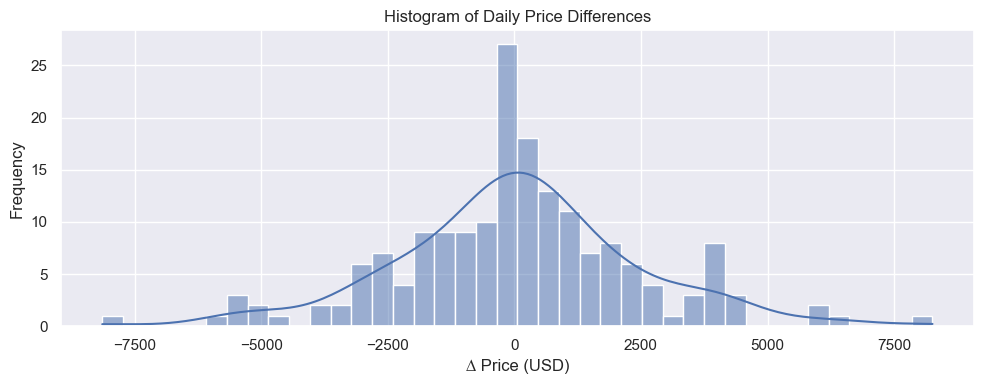

In [10]:
# 5. Distribution of Price Differences
plt.figure(figsize=(10, 4))
sns.histplot(df['price_diff'].dropna(), bins=40, kde=True)
plt.title('Histogram of Daily Price Differences')
plt.xlabel('∆ Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

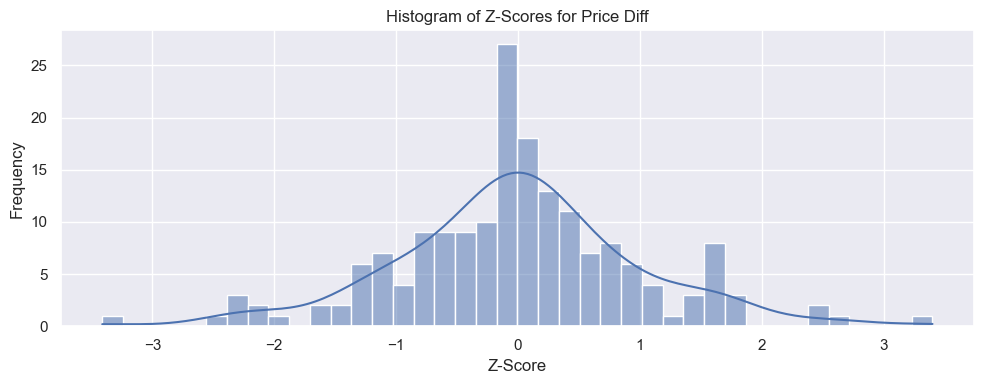

In [11]:
# 6. Distribution of Z-Scores
plt.figure(figsize=(10, 4))
sns.histplot(df['z_score'].dropna(), bins=40, kde=True)
plt.title('Histogram of Z-Scores for Price Diff')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

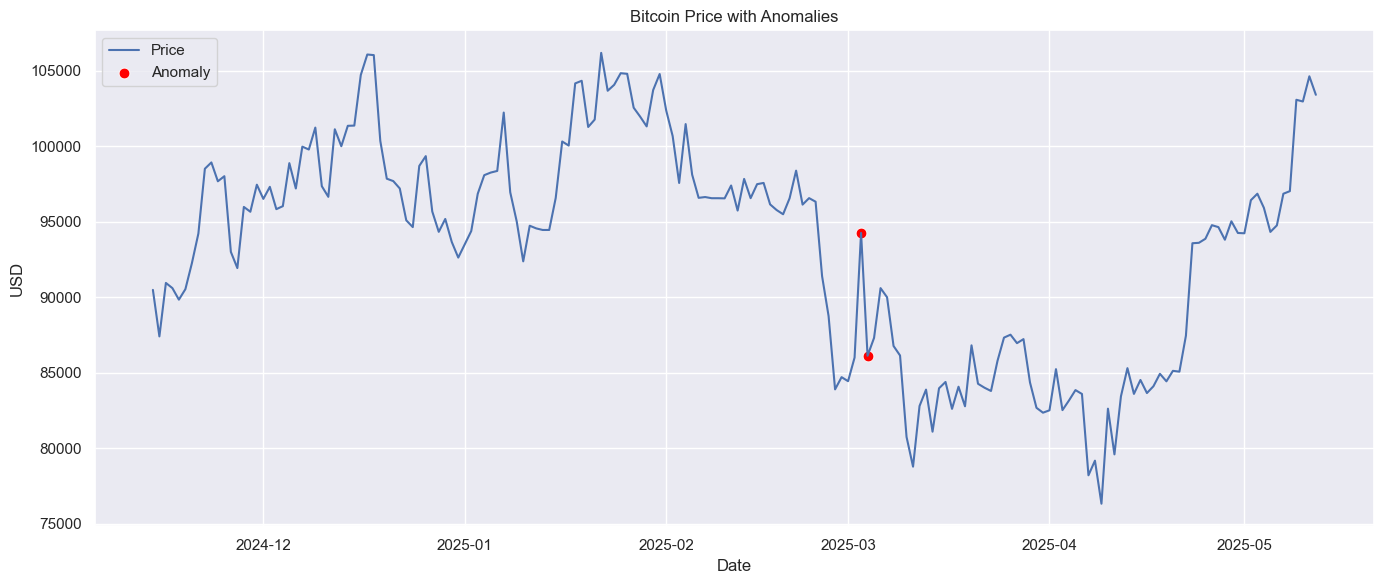

In [12]:
# 7. Price with Anomalies Highlighted
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='price', data=df, label='Price')
anoms = df[df['anomaly'] == 1]
sns.scatterplot(x='date', y='price', data=anoms, color='red', label='Anomaly', s=60)
plt.title('Bitcoin Price with Anomalies')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.tight_layout()
plt.show()

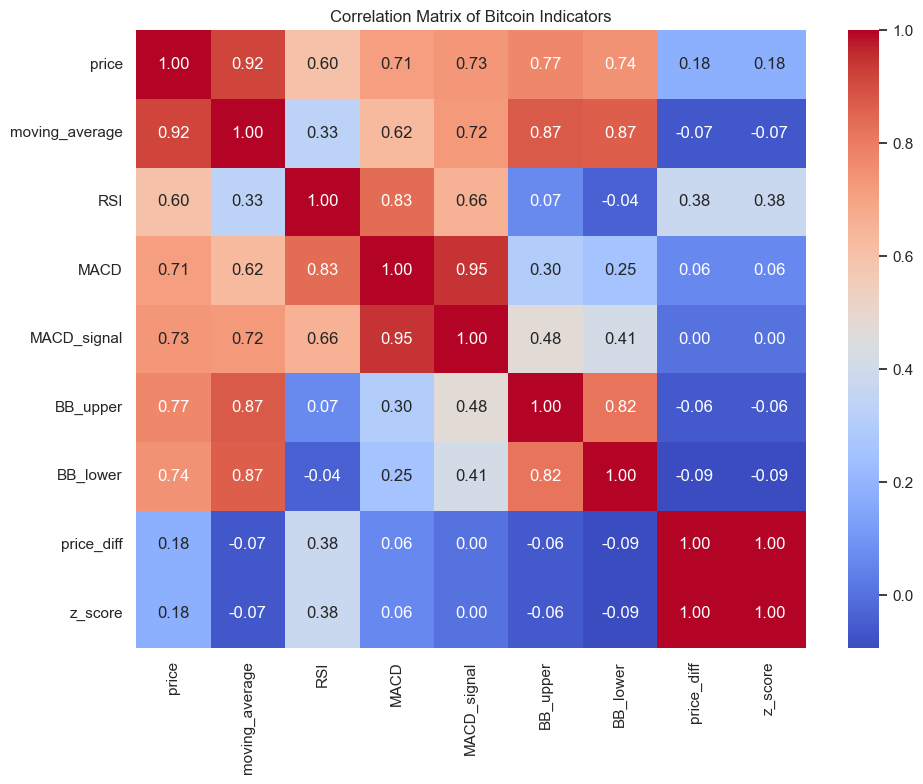

In [13]:
# 8. Correlation Heatmap of Indicators
cols = ['price', 'moving_average', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_lower', 'price_diff', 'z_score']
corr = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Indicators')
plt.tight_layout()
plt.show()